In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

% matplotlib inline

# Simple example that shows how to mix Python and D3.js

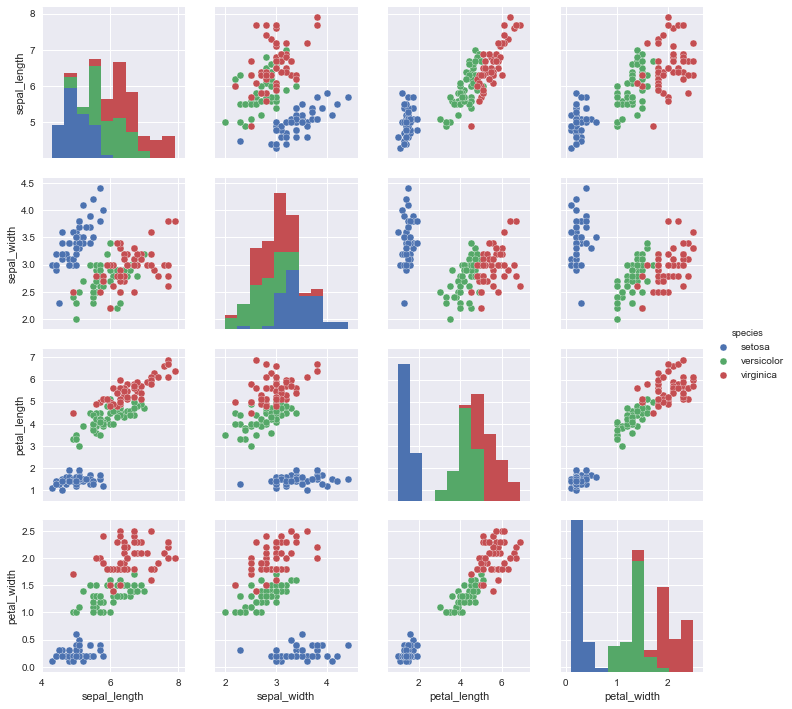

In [2]:
data = sns.load_dataset('iris')
sns.pairplot(data, hue='species')

## (1) simple scatter plot with d3.js

In [3]:
from IPython.core.display import display, HTML
from IPython.display import Javascript, JSON
json = data.to_json(orient='records')
display(Javascript("window.data={};".format(json)))

<IPython.core.display.Javascript object>

In [4]:
%%javascript
require.config({
    paths: {
        'd3': 'http://d3js.org/d3.v4.min'
    }
});

require(['d3'], function(d3){
    //create canvas element
    $("#chart1").remove();
    element.append("<div id='chart1'></div>");
    $("#chart1").width("960px");
    $("#chart1").height("600px");     

    // some layout variables
    var margin = {top: 20, right: 20, bottom: 30, left: 40},
        width = 720 - margin.left - margin.right,
        height = 375 - margin.top - margin.bottom;

    var x = d3.scaleLinear()
        .range([0, width]);

    var y = d3.scaleLinear()
        .range([height, 0]);

    var color = d3.scaleOrdinal(d3.schemeCategory10);
    
    var xAxis = d3.axisBottom()
        .scale(x)

    var yAxis = d3.axisLeft()
        .scale(y)

    var svg = d3.select("#chart1").append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
      .append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // retrieve and plot data
    var data = window.data;
    
    x.domain(d3.extent(data, function(d) {return d.sepal_width;})).nice();
    y.domain(d3.extent(data, function(d) {return d.sepal_length;})).nice();

    svg.selectAll().data(data)
        .enter().append("circle")
          .attr("r", 3.5)
          .attr("cx", function(d) {return x(d.sepal_width);})
          .attr("cy", function(d) {return y(d.sepal_length);})
          .attr("style", "fill:blue")
    
//     // plot axes
    svg.append("g")
        .attr("class", "x axis")
        .attr("transform", "translate(0," + height + ")")
        .call(xAxis)
        .append("text")
        .attr("class", "label")
        .attr("x", width)
        .attr("y", -6)
        .style("text-anchor", "end")
        .text("sepalWidth");

    svg.append("g")
        .attr("class", "y axis")
        .call(yAxis)
        .append("text")
        .attr("class", "label")
        .attr("transform", "rotate(-90)")
        .attr("y", 6)
        .attr("dy", ".71em")
        .style("text-anchor", "end")
        .text("sepalLength")
});

<IPython.core.display.Javascript object>

## Decision Tree plot with d3.js

In [5]:
from sklearn.tree import DecisionTreeClassifier

X, y = data.drop('species', axis=1), data['species']

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
from sklearn.tree import _tree
    
def recurse(model, node=None, rules=None):
    if node is None:
        node = 0
        
    if rules is None:
        rules = {'name': 'node{:d}'.format(node),
                 'rule': 'root'}
        for ivalue, value in enumerate(model.tree_.value[node].flatten()):
            rules['value{:d}'.format(ivalue)] = value
        
    if model.tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = model.tree_.feature[node]
        threshold = model.tree_.threshold[node]
        
        child_left = model.tree_.children_left[node]
        child_right = model.tree_.children_right[node]
        rule_left = [name, '<', threshold]
        rule_right = [name, '>', threshold]
        
        rules['children'] = [{'name': 'node{:d}'.format(child_left),
                              'rule': '{} {} {:2.2g} '.format(*rule_left),
                              'values': list(model.tree_.value[child_left].flatten()),
                              'impurity': model.tree_.impurity[child_left]},
                             {'name': 'node{:d}'.format(child_right),
                              'rule': '{} {} {:2.2g} '.format(*rule_right),
                              'values': list(model.tree_.value[child_right].flatten()),
                              'impurity': model.tree_.impurity[child_left]}]
        
#         for ivalue, value in enumerate(model.tree_.value[child_left].flatten()):
#             rules['children'][0]['value{:d}'.format(ivalue)] = [value, value]
#         for ivalue, value in enumerate(model.tree_.value[child_right].flatten()):
#             rules['children'][1]['value{:d}'.format(ivalue)] = [value, value]
        
        recurse(model, child_left, rules['children'][0])
        recurse(model, child_right, rules['children'][1])
    return rules

rules = recurse(model)

In [7]:
from IPython.core.display import display
from IPython.display import Javascript
print(str([rules]))
display(Javascript("window.data_tree={};".format(rules)))

[{'value2': 50.0, 'value1': 50.0, 'children': [{'values': [50.0, 0.0, 0.0], 'name': 'node1', 'rule': '2 < 2.5 ', 'impurity': 0.0}, {'values': [0.0, 50.0, 50.0], 'children': [{'values': [0.0, 49.0, 5.0], 'children': [{'values': [0.0, 47.0, 1.0], 'children': [{'values': [0.0, 47.0, 0.0], 'name': 'node5', 'rule': '3 < 1.7 ', 'impurity': 0.0}, {'values': [0.0, 0.0, 1.0], 'name': 'node6', 'rule': '3 > 1.7 ', 'impurity': 0.0}], 'name': 'node4', 'rule': '2 < 4.9 ', 'impurity': 0.04079861111111116}, {'values': [0.0, 2.0, 4.0], 'children': [{'values': [0.0, 0.0, 3.0], 'name': 'node8', 'rule': '3 < 1.5 ', 'impurity': 0.0}, {'values': [0.0, 2.0, 1.0], 'children': [{'values': [0.0, 2.0, 0.0], 'name': 'node10', 'rule': '2 < 5.4 ', 'impurity': 0.0}, {'values': [0.0, 0.0, 1.0], 'name': 'node11', 'rule': '2 > 5.4 ', 'impurity': 0.0}], 'name': 'node9', 'rule': '3 > 1.5 ', 'impurity': 0.0}], 'name': 'node7', 'rule': '2 > 4.9 ', 'impurity': 0.04079861111111116}], 'name': 'node3', 'rule': '3 < 1.8 ', 'imp

<IPython.core.display.Javascript object>

In [84]:
%%javascript
require.config({
    paths: {
        'd3': 'http://d3js.org/d3.v4.min'
    }
});

require(['d3'],
function(d3){
    //create canvas element
    $("#chart2").remove();
    element.append("<div id='chart2'></div>");
    $("#chart2").width("600px");
    $("#chart2").height("400px");

    // some layout variables
    var margin = {top: 20, right: 20, bottom: 30, left: 40},
        width = 600 - margin.left - margin.right,
        height = 500 - margin.top - margin.bottom;
    
    var svg = d3.select("#chart2").append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom)
      .append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    var nodes = d3.hierarchy(window.data_tree);
    
    var treemap = d3.tree()
        .size([500, 400]);
    
    nodes = treemap(nodes);
    var n_classes = nodes.descendants().slice(1)[0].data.values.length;

    function add(a, b) {return a + b;};
    function purity(values){return Math.max(...values)/values.reduce(add, 0);};
    function indexOfMax(arr) {
        if (arr.length === 0) {
            return -1;
        }
        var max = arr[0];
        var maxIndex = 0;
        for (var i = 1; i < arr.length; i++) {
            if (arr[i] > max) {
                maxIndex = i;
                max = arr[i];
            }
        };
        return maxIndex;
    };
    
    function get_link_color(values){
        var hues = [0, 120, 270];
        var hue = hues[indexOfMax(values)];
        var saturation = purity(values);
        var lightness = 1-purity(values)/2;
        var color = d3.hsl(hue, saturation, lightness);
        return color;
    };
    
//     alert(nodes.descendants().slice(1)[2].data.values);
//     alert(nodes.descendants().slice(1)[2].data.values.reduce(add, 0));
//     alert(Math.max(...nodes.descendants().slice(1)[2].data.values));
//     alert(purity(nodes.descendants().slice(1)[2].data.values));
//     alert(get_link_color(nodes.descendants().slice(1)[2].data.values));
    
    svg.append("svg:defs").selectAll("marker")
        .data(nodes.descendants().slice(1).reverse())
      .enter().append("svg:marker")
        .attr("id", function(d, i) { return "arrow" + i; }) 
        .attr("viewBox", "0 -5 10 10")
        .attr("refX", 0)
        .attr("refY", 0)
        .attr("markerWidth", 4)
        .attr("markerHeight", 4)
        .attr("orient", 90)
      .append("svg:path")
        .attr("d", "M0,-3L4,0L0,3")
        .attr("style", function (d) {return "fill:" + get_link_color(d.data.values) + ";";});
    
    var link = svg.selectAll('.link')
        .data(nodes.descendants().slice(1).reverse())
      .enter().append("path")
        .attr("class", "link")
        .attr("d", function(d) {
           return "M" + d.x + "," + d.y
             + "C" + d.x + "," + (d.y + d.parent.y) / 2
             + " " + d.parent.x + "," +  (d.y + d.parent.y) / 2
             + " " + d.parent.x + "," + d.parent.y;
           })
        .attr('style', function(d) {return 'fill:None;stroke:'
            + get_link_color(d.data.values) + ';stroke-width:' 
                + d.data.values.reduce(add,0)/5 + ';'})
        .attr("marker-start", function(d, i) { return "url(#arrow" + i + ")"; });
        
    var node = svg.selectAll(".node").data(nodes.descendants())
      .enter().append("g")
        .attr("class", function(d) { 
                         return "node" + 
                        (d.children ? " node--internal" : " node--leaf"); })
        .attr("transform", function(d) {return "translate(" + d.x + "," + d.y + ")";});
    
    node.append("text")
      .attr("dy", ".35em")
      .attr("y", 0)
      .style("text-anchor", "middle")
      .text(function(d) { return d.data.rule; });
});

<IPython.core.display.Javascript object>